In [1]:
import spekpy as sp
import matplotlib.pyplot as plt # Import pyplot for plotting

70 кВ 0.02 мм Al 6568.02 мкрГр
80 кВ 0.02 мм Al 6449.51 мкрГр
100 кВ 0.02 мм Al 6220.55 мкрГр
120 кВ 0.02 мм Al 6078.64 мкрГр
140 кВ 0.02 мм Al 6036.9 мкрГр


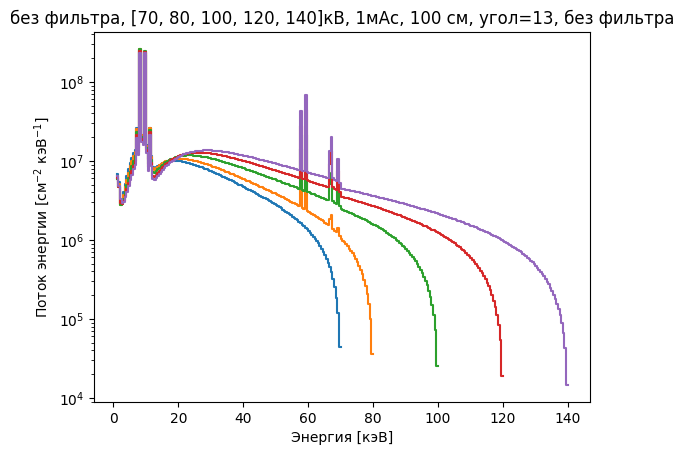

In [78]:
#mas можно задавать в функции, миллиампер-секунда
#Вольфрамовый анод, спектры в зависимости от напряжения
#1 мА*с, 100 см
#Варьируем напряжение на аноде без фильтра
s=sp.Spek (kvp=100, th=13, targ='W', z=100) #Расстояние в сантиметрах

for pot in [70, 80, 100, 120, 140]:
    s.set(kvp=pot)
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k)
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления. По умолчанию - Алюминий
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.yscale('log')
plt.title('без фильтра, [70, 80, 100, 120, 140]кВ, 1мАс, 100 см, угол=13, без фильтра')
plt.show()

70 кВ 3.82 мм Al 25.55 мкрГр
80 кВ 5.97 мм Al 14.28 мкрГр
100 кВ 8.32 мм Al 15.57 мкрГр
120 кВ 10.11 мм Al 17.22 мкрГр
140 кВ 11.58 мм Al 18.58 мкрГр


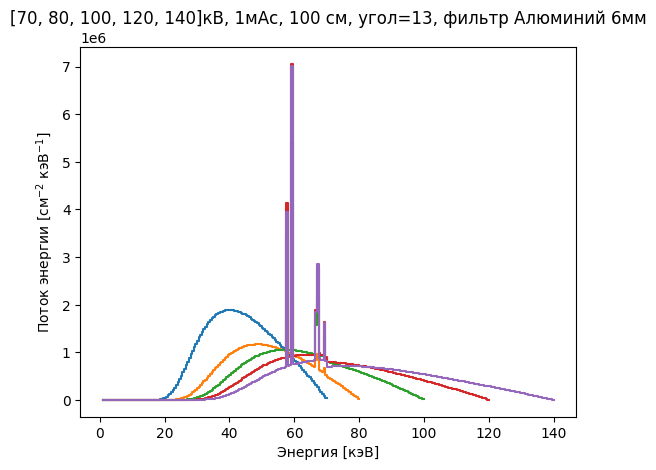

In [82]:
#Варьируем напряжение на аноде с фильтром
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 

for pot in [70, 80, 100, 120, 140]:
    s.filter('Al',6) #Фильтр в миллиметрах
    s.set(kvp=pot)
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k)
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.title('[70, 80, 100, 120, 140]кВ, 1мАс, 100 см, угол=13, фильтр Алюминий 6мм')
plt.show()

140 кВ 2.02 мм Al 211.62 мкрГр
140 кВ 3.77 мм Al 106.26 мкрГр
140 кВ 4.92 мм Al 70.45 мкрГр
140 кВ 5.78 мм Al 51.39 мкрГр
140 кВ 6.46 мм Al 39.39 мкрГр


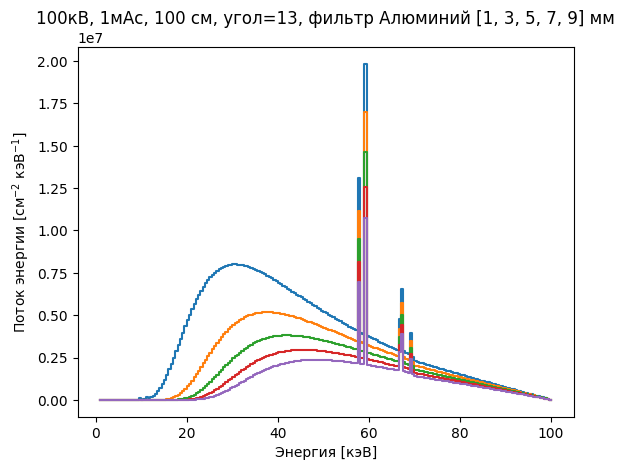

In [80]:
#Варьируем толщину фильтра из алюминия
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 
i=0
for filt in [1, 3, 5, 7, 9]: #Реальные значения толщины фильтров в мм, не аддитивно
    s.filter('Al',filt-i) #Фильтр в миллиметрах
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k)
    i=filt
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.title('100кВ, 1мАс, 100 см, угол=13, фильтр Алюминий [1, 3, 5, 7, 9] мм')
plt.show()

140 кВ 7.31 мм Al 8.44 мкрГр
140 кВ 7.97 мм Al 3.43 мкрГр
140 кВ 8.51 мм Al 1.44 мкрГр
140 кВ 8.96 мм Al 0.62 мкрГр
140 кВ 9.34 мм Al 0.27 мкрГр


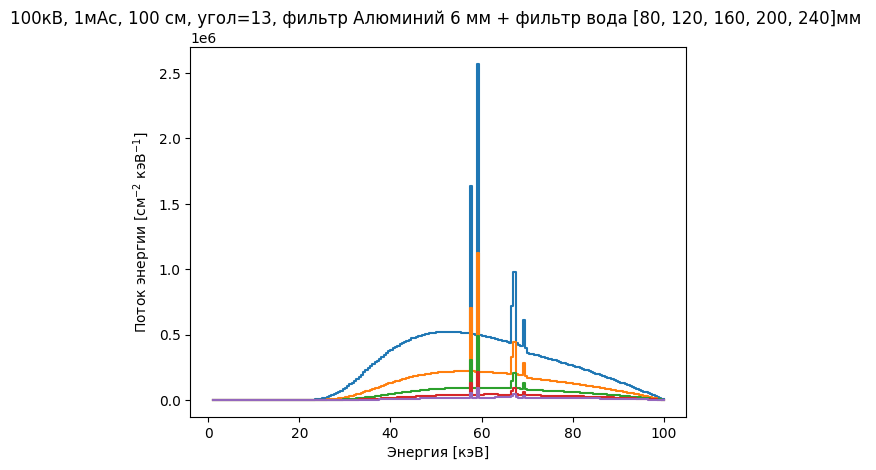

In [85]:
#Варьируем тощину слоя воды
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 
s.filter('Al',6) #Фильтр в миллиметрах
i=0
for water_thickness in [80, 120, 160, 200, 240]: #Указаны реальные значения толщины фильтров в мм, не аддитивно
    s.filter('water',water_thickness-i) #Фильтр в миллиметрах
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k)
    i=water_thickness
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.title('100кВ, 1мАс, 100 см, угол=13, фильтр Алюминий 6 мм + фильтр вода [80, 120, 160, 200, 240]мм ')
plt.show()